### When you answer your questions, please use [emoji](https://getemoji.com/) and [good markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) so that it is easy for Mahyar to find your work and grade it. Thanks!

Be sure to put your name here:
*  Mikayla Norton


____

# HW #3

____

In [103]:
import seaborn as sns
import pandas as pd

____
## GitHub

It is important to have a public place to show your work, and GitHub (GH) is one of the standards you need to know for this. By the end of the semester you will have GH repos (repositories) for both of your projects. Among other goals, this will allow you to show off your work!

I expect that the students in this class have very different experiences with GH, so this problem might be really short or really long.

✍🏻 (5pts) First, make a GH account for yourself [here](https://github.com/). Put your GH account information in a markdown cell. If you already have a GH repo, you do not need to create a new one; just put the name in the markdown cell. Or, create a new account for this class. I would like to collect the projects in one place so that we can all see them, even after the class is over.

If you want to brush up on GH, or learn it from scratch, I recommend watching some YouTube videos. I recommend [this one](https://www.youtube.com/watch?v=x0EYpi38Yp4), or [this one](https://www.youtube.com/watch?v=DVRQoVRzMIY) and this pair: [first one](https://www.youtube.com/watch?v=USjZcfj8yxE) and [second one](https://www.youtube.com/watch?v=nhNq2kIvi9s).

If you have any questions, please ask us! We are here to help!

✍🏻 (2 pts) Second, once you have your personal GH repo setup, practice by putting your web apps from this class there.

Put a link to your web app here so that Mahyar can check to see that it worked.

🔆 <font color="blue"> Github info/repo for this class: https://github.com/mikayla-norton/cmse830 </font>

🔆 <font color="blue"> See in "HWs" subfolder -> HW2.py is a web app </font>

____
## Project Practice

This week you are going to practice for your midterm project. The midterm project is DS and the final project is machine learning (ML). What we want to explore in this problem is what we can do with DS.

You will choose the topic of your project. This means:
* you can use a dataset that you have from your job,
* you can use a dataset that leads to a publication,
* or, you can use a standard dataset if you don't have your own.

The point is that this is flexible and can scale with each student. What I don't recommend is building your own dataset. While I would very much love to see that, there is a risk that it will take too long and possibly not lead to anything. (If you really want to do that, contact me!)

Because the projects will be quite different, the instructions will be somewhat vague on purpose. But, here are the rules:
1. use most of the tools of EDA,
2. use visualization at a professional level (which we will cover soon),
3. be as quantitive as possible, using statistical tools,
4. have a question or goal in mind -- **a story**; or, if you explore a dataset, you should reach a new conclusion or observation about the dataset,
5. the final result will be a web app that others can access. (I will walk you through using `streamlit` with `GitHub` and `Heroku`, but talk to me if you want to use any of the many other options.)

✍🏻 (15 pts) Pick **three** datasets - your choice. You can find a lot of datasets [here](https://archive.ics.uci.edu/); search for topics that are of most interest to you. From these three datasets, write code to perform EDA on them and put that below. Below the EDA code cells for each dataset, open a markdown cell and write a paragraph that answers these questions:
1. why did you pick this dataset?
2. are there any interesting insights you gained from performing EDA on this dataset? (use all/most of the Seaborn tools we discussed this week)
3. are there any actionable insights you can get from this data? (For example, if you were a CEO and looking at the mpg dataset, what might you conclude?)

Finally, open a new markdown and discuss which of these three datasets would make the best project dataset. Were some of the datasets disappointing? Was one of the datasets much richer with possibilities? The reason you are asked to pick three is that some datasets is that you need to be able to assess which datasets are more or less interesting for your projects.

[Here is an example you can follow that uses a wine dataset.](https://murillogroupmsu.com/wine/) It is also [at GH](https://gist.github.com/MurilloGroupMSU/678f61bbe225bdd166e8b946765d2931).


[First choice dataset for midterm project](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022)

In [104]:
file1 = pd.read_csv("/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/Emissions/GCB2022v27_MtCO2_flat.csv")
file1
print("Total number of entries: "+str(len(file1["Year"])))
file1.isna().sum()

Total number of entries: 63104


Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [105]:
## data cleaning
na_counts = file1.isna().sum(axis=1)
df = file1.drop(na_counts[na_counts > file1.shape[1]/2].index, axis=0)
df.isna().sum() #significantly fewer NaN values

Country                   0
ISO 3166-1 alpha-3       84
Year                      0
Total                     0
Coal                    159
Oil                     258
Gas                     285
Cement                 4261
Flaring                 353
Other                 20283
Per Capita             4480
dtype: int64

In [106]:
years = list(df["Year"].unique())
years.sort(reverse=False)
print("The first year analyzed is "+str(years[0])+", the last year analyzed is "+str(years[-1]))

The first year analyzed is 1750, the last year analyzed is 2021


<Axes: >

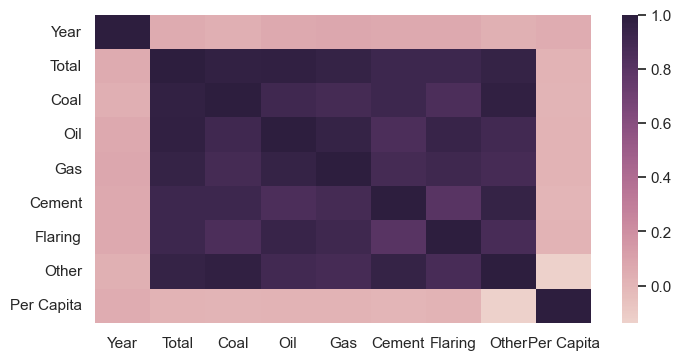

In [107]:
df_corr = df.select_dtypes('number').corr()
cubehelix_palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(df_corr, cmap=cubehelix_palette) #Tells you almost nothing

<Axes: xlabel='Year', ylabel='Total'>

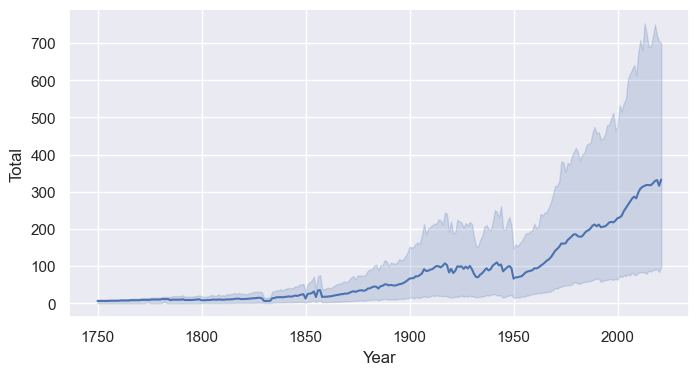

In [108]:
sns.lineplot(df,x="Year", y="Total")

This dataset provides a lot of creative uses for user interaction. I plan to use this dataset to display time series data of emissions most directly. For more interaction, the user will be able to filter various visualizations by country, or type of emission, or even display all emissions (from a category or total) for a given year. The EDA does not appear overly exciting without doing some much deeper pre-processing, but it clearly shows the data structure, trends in emissions, and that no category is clearly correlated with others. This data also spans multiple centries and almost all countries, leaving a lot of room for exploration and storytelling. This dataset was disappointing in surface level EDA without diving in further, but the possibilities are extremely vast.

[Second choice dataset for midterm project](https://archive.ics.uci.edu/dataset/73/mushroom)

In [109]:

cols = ["class", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
        "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
        "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

data = pd.read_csv("/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/mushroom/agaricus-lepiota.data", delimiter=",", names=cols,header=None)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [110]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [111]:
data["class"] = data["class"].replace("e", "edible")
data["class"] = data["class"].replace("p", "poisonous")
data.head() # I would want to do this for all columns if I used this data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [112]:
for i in data.columns:
    data[i].unique()
    data[i].replace(list(data[i].unique()),
                        range(len(list(data[i].unique()))), inplace=True)


<Axes: >

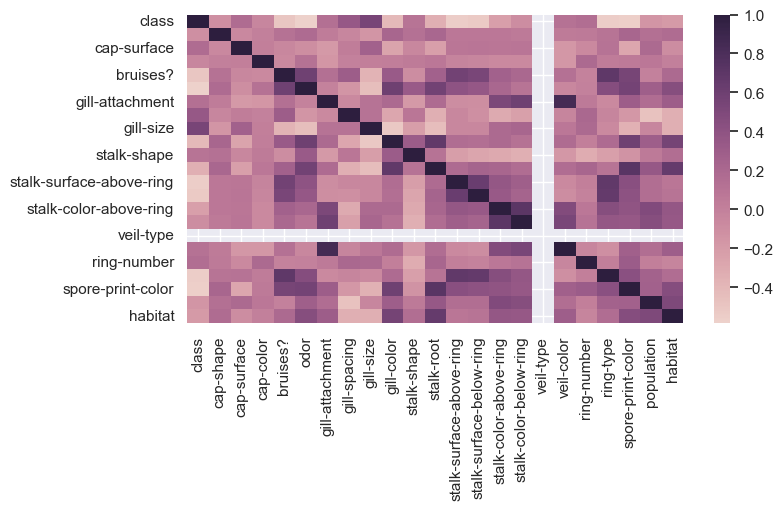

In [113]:
mush_corr = data.corr()
cubehelix_palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(mush_corr, cmap=cubehelix_palette)

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


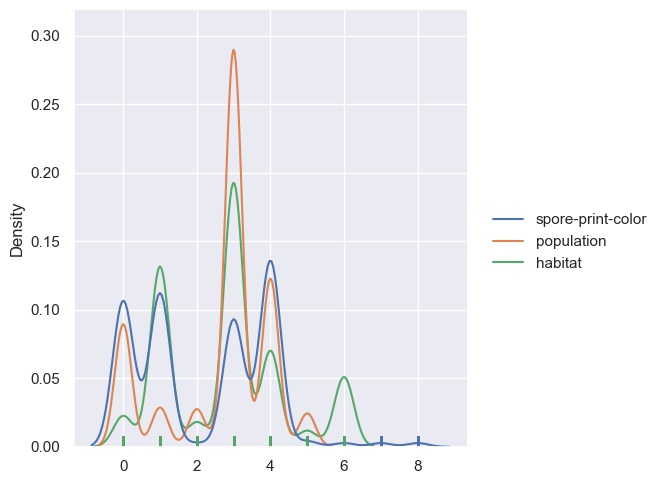

In [114]:
# sns.displot(data["class"],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 1:4],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 4:6],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 6:10],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 10:16],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 16:18],kind = 'kde',rug = 'True')
# sns.displot(data.iloc[:, 18:20],kind = 'kde',rug = 'True') #commenting most for space saving
sns.displot(data.iloc[:, 20:24],kind = 'kde',rug = 'True')

This data set wasn't at all how I was expecting. It is entirely categorical, despite me filtering for multivariate datatypes when searching for data. With that in mind, it was sort of disappointing and I couldn't imagine as many possibilities with it. I spent a lot of time exploring distributions and converted the values to numeric dummies instead of categories so that I would be able to "track correlation" which is obviously less valuable with categories. I couldn't find many meaningful insights, and was also greatly frustrated by the input data file.

[Third choice dataset for midterm project](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [115]:
spotify = pd.read_csv(r"/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/spotify-2023.csv", encoding='latin-1')
for i in range(len(spotify['streams'])):
    try:
        spotify['streams'][i] = float(spotify['streams'][i])
    except:
        spotify = spotify.drop([i])
spotify['streams'] = pd.to_numeric(spotify['streams'])
spotify.head()

/var/folders/p_/2j3j3pp93175gydc37vsk5nh0000gn/T/ipykernel_31747/3384068319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'][i] = float(spotify['streams'][i])
/var/folders/p_/2j3j3pp93175gydc37vsk5nh0000gn/T/ipykernel_31747/3384068319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'][i] = float(spotify['streams'][i])
/var/folders/p_/2j3j3pp93175gydc37vsk5nh0000gn/T/ipykernel_31747/3384068319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [116]:
spotify.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

<Axes: >

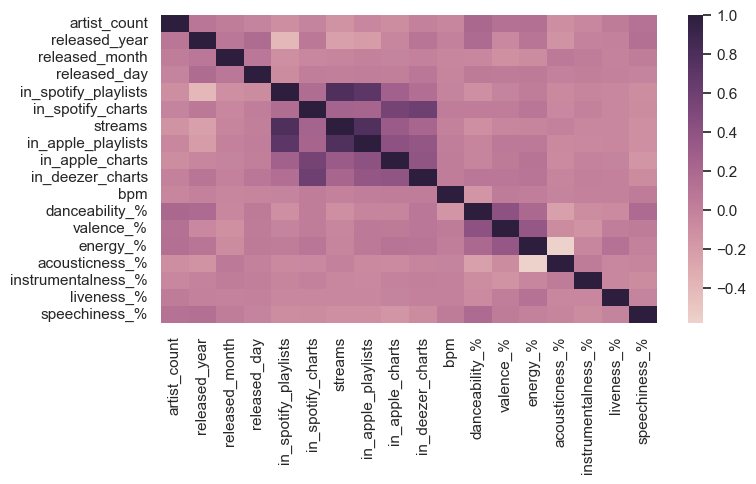

In [117]:
spotify_corr = spotify.corr(numeric_only=True)
cubehelix_palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(spotify_corr, cmap=cubehelix_palette)

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


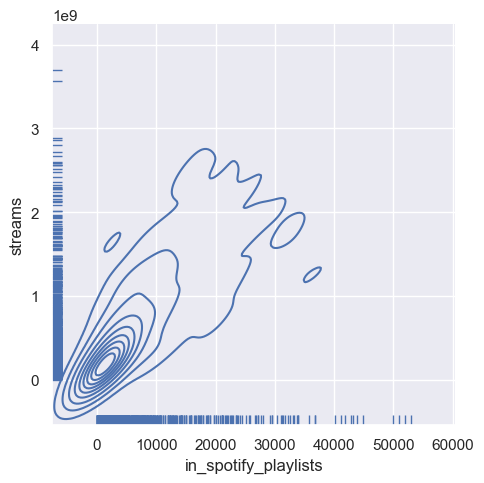

In [118]:
sns.displot(spotify, x="in_spotify_playlists", y="streams", kind="kde", rug=True) #substituted randomly

For this last dataset, I was curious to see how it would compare with a previous Spotify project I have on my portfolio. However, the EDA indicates similar conclusions: song features hold minimal correlations to popularity. However, it would have been interesting to study how already successful artists compare to smaller artists. Also, the data for this set took some interesting workarounds to ensure the "streams" value was numeric. In addition, the KDE plots show most correlative distributions between streams with playlist presence or on the charts, both which would naturally be assumed as directly correlated. Despite my love for music, I did not see this dataset comparing with my previous project on insights, and would give up on it being a primary topic for the midterm this year.

____
## Pandas Practice

✍🏻  (10pts) From the standard penguins dataset, answer this question: what percentage of female penguins from Dream have a body mass greater than $4000$ grams? (Use only Pandas attributes and methods. Show your code as well as your answer.)

[Hint.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [119]:
peng = sns.load_dataset("penguins")
peng.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [120]:
len(peng[(peng['sex'] == "Female") & (peng['island'] == "Dream")& (peng['body_mass_g'] > 4000)])\
    /len(peng[(peng['sex'] == "Female") & (peng['island'] == "Dream")])

0.01639344262295082

____
## Python Practice

✍🏻 (5 pts) Run each of these codes and explain what how keywords work in Python functions.

In [121]:
def who_I_am(name, class_number, department):
  print(f"Hello. My name is {name} and I am in {department} {class_number} this semester.")

def who_I_am_kw(name, class_number=830, department="CMSE"):
  print(f"Hello. My name is {name} and I am in {department} {class_number} this semester.")

🔆 <font color="blue"> For the first function, `who_I_am`, the function must take in three variables with no defined default value</font>

🔆 <font color="blue"> For the second function, `who_I_am_kw`, the function must take in one variable with no defined default value, and two optional values that have pre-defined defaults. Both print a statement after to display a student name and department listing with class number for enrollment.</font>

In [122]:
who_I_am("John", 830, "CMSE")

Hello. My name is John and I am in CMSE 830 this semester.


🔆 <font color="blue">In this cell, the three variables follow expected format for the `who_I_am` function</font>

In [123]:
who_I_am(830, "CMSE", "John")

Hello. My name is 830 and I am in John CMSE this semester.


🔆 <font color="blue">The variables here were given out of order, which disrupts the print statement sentence flow.</font>

In [124]:
who_I_am(name = "John", class_number = 830, department = "CMSE")

Hello. My name is John and I am in CMSE 830 this semester.


🔆 <font color="blue">These variables were given in order, and set to their keywords, which does nothing but add redundancy</font>

In [125]:
who_I_am(department = "CMSE", class_number = 830, name = "John")

Hello. My name is John and I am in CMSE 830 this semester.


🔆 <font color="blue"> These variables were given out of order, but set to their keywords, which ensures the print statement still works in the expected manner</font>

In [126]:
who_I_am_kw("Jack")

Hello. My name is Jack and I am in CMSE 830 this semester.


🔆 <font color="blue"> We are using the `who_I_am_kw` function now, which only requires the name keyword. In this cell "Jack" is provided, and the defaults are used, printing the statement with Jack, 830, and CMSE</font>

In [127]:
who_I_am_kw("Jack", class_number = 123)

Hello. My name is Jack and I am in CMSE 123 this semester.


🔆 <font color="blue"> The required variable is given as "Jack" but one of the keywords is addressed to set the class number as something other than "830"</font>

In [128]:
who_I_am_kw(class_number = 123, "Jack")

SyntaxError: positional argument follows keyword argument (2915810975.py, line 1)

🔆 <font color="blue"> This last command does not work, because the positional/required (name) value is provided after one of the keyword options (class number). Positional arguments must always be provided before keyword values.</font>

____
## PEP-8

✍🏻 (5 pts) Which of these follows the [PEP-8 standard](https://peps.python.org/pep-0008/)?

* `if x == 4 : print(x , y) ; x , y = y , x`
* `if x == 4: print(x, y); x, y = y, x`
* neither of these

🔆 <font color='blue'> `if x == 4 : print(x , y) ; x , y = y , x` is incorrect, `if x == 4: print(x, y); x, y = y, x` follows more PEP-8 standards because there are no extraneous white spaces in the statement before punctuation. But ultimately I would consider both incorrect because each uses compound statements (multiple statements on the same line). It is sometimes okay for small if statements but not for if-statements with multiple clauses. `if x == 4: print(x, y); x, y = y, x` could go either way depending on interpretation of that rule. </font>

____
## EDA: Seaborn and Correlations

✍🏻  (10pts) Read in the mpg dataset and perform EDA on it. Specifically:
* get the basic statistics from the df,
* make a `displot` of horsepower versus mpg, including a rug plot and with a kde,
* make a Seaborn `heatmap` of the correlations using Pandas' `.corr`, with annotations and your choice of colormap,
* make a `regplot` ([or, `lmplot`](https://seaborn.pydata.org/tutorial/regression.html)) of horsepower versus mpg using the lowess smoother; choose good colors,
* design a `FacetGrid` of your choice.

After each plot, open a markdown cell and give one sentence of what the plot tells you. That is, as a data scientist, what did this form of EDA reveal about the data? (If it didn't reveal anything to you, that is also an important possible answer.)

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


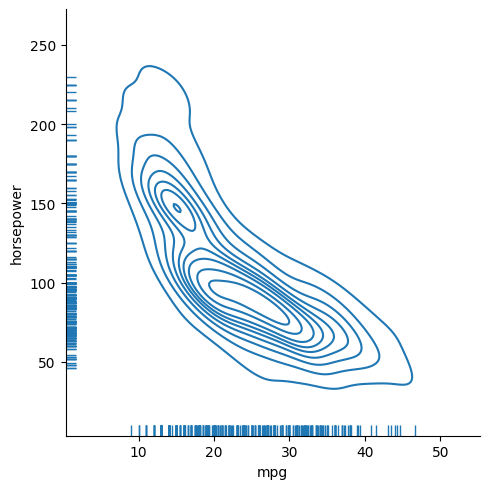

In [ ]:
sns.displot(mpg, x="mpg", y="horsepower", kind="kde", rug=True)

<Axes: >

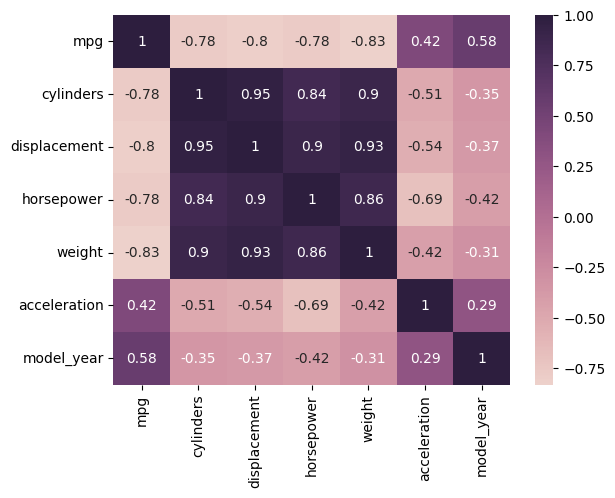

In [ ]:
mpg_corr = mpg.select_dtypes('number').corr()
cubehelix_palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(mpg_corr, annot=True, cmap=cubehelix_palette) 

<Axes: xlabel='mpg', ylabel='horsepower'>

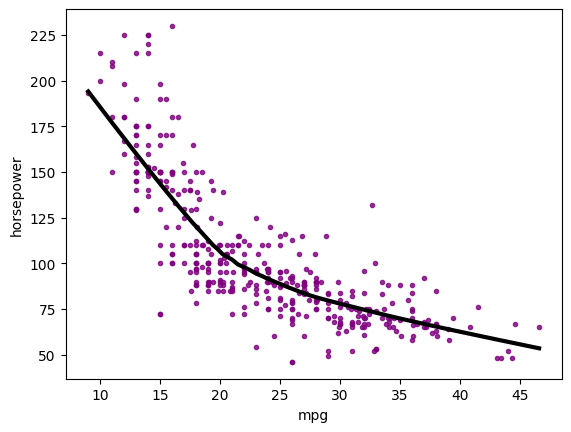

In [ ]:
sns.regplot(mpg, x="mpg", y="horsepower", lowess=True, scatter_kws={"s": 9, 'color': 'purple'}, line_kws={"lw":3, 'color': 'black'})

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


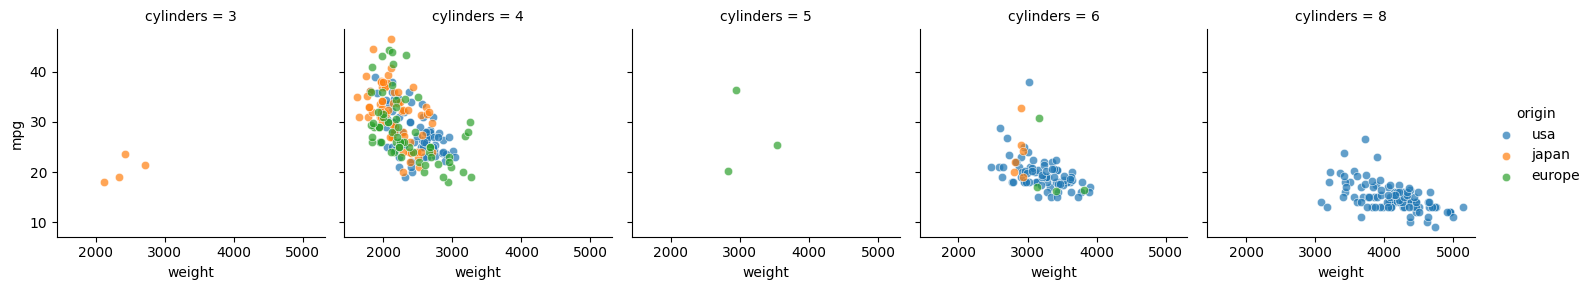

In [ ]:
f = sns.FacetGrid(mpg, col="cylinders", hue="origin")
f.map(sns.scatterplot, "weight", "mpg", alpha=0.7)
f.add_legend()